<a href="https://colab.research.google.com/github/Kanabee/08042023/blob/main/Project_Trend_Forcasting_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pipeline
1. Get data
2. Extract features
3. Train model
4. Test model
5. Evaluate

# Get data

## Download data from kaggle


https://www.kaggle.com/competitions/rossmann-store-sales/data?select=store.csv

In [1]:
!gdown https://drive.google.com/uc?id=1sz5dF1GSd8v_Y6aPnQUm4QtWgFWp_OiM # โหลด kaggle token

Downloading...
From: https://drive.google.com/uc?id=1sz5dF1GSd8v_Y6aPnQUm4QtWgFWp_OiM
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 292kB/s]


In [2]:
! pip install -q kaggle # install kaggle library

In [3]:
! mkdir ~/.kaggle # สร้างโฟลเดอร์สำหรับเก็บไฟล์ json ของ kaggle

In [4]:
! cp kaggle.json ~/.kaggle/ # ก็อบปี้ไฟล์ json ไปยังโฟลเดอร์ที่สร้างไว้

In [5]:
! chmod 600 ~/.kaggle/kaggle.json # เปลี่ยนสิทธิ์ในการเข้าถึงไฟล์

In [6]:
! kaggle competitions download -c rossmann-store-sales # โหลดไฟล์ที่ต้องการจากเว็บไซต์ของ kaggle โดยตรง

 57% 4.00M/6.99M [00:00<00:00, 6.21MB/s]
100% 6.99M/6.99M [00:01<00:00, 7.20MB/s]


In [7]:
! mkdir Data # สร้างโฟลเดอร์ไว้สำหรับเก็บไฟล์ที่จะ unzip

In [8]:
!unzip rossmann-store-sales.zip -d Data # unzip ไฟล์ไปไว้ในโฟลเดอร์ที่สร้างไว้ (ในที่นี้คือโฟลเดอร์ชื่อ Data)

Archive:  rossmann-store-sales.zip
  inflating: Data/sample_submission.csv  
  inflating: Data/store.csv          
  inflating: Data/test.csv           
  inflating: Data/train.csv          


## Import library

In [ ]:
# Import library ที่จะใช้งาน
import pandas as pd
import numpy as np # กลุ่ม library สำหรับจัดการข้อมูล

import seaborn as sns
import matplotlib.pyplot as plt # กลุ่ม library สำหรับพล็อตกราฟ

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # กลุ่ม library สำหรับทำ machine learning

import datetime # library ที่ใช้ในการจัดการวันที่

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # library ที่ใช้ในการปิดการแจ้งเตือนของ colab

## Read data from file

In [9]:
# นำข้อมูลจากไฟล์มาเก็บไว้ในตัวแปร
def read_data():
  process = pd.read_csv('/content/Data/train.csv')
  test = pd.read_csv('/content/Data/test.csv')
  return process, test

In [ ]:
df_process, df_test = read_data()

# เช็คลักษณะข้อมูลข้างในชุดข้อมูล 5 แถวแรก
df_process.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## Exploratory Data Analysis (EDA)

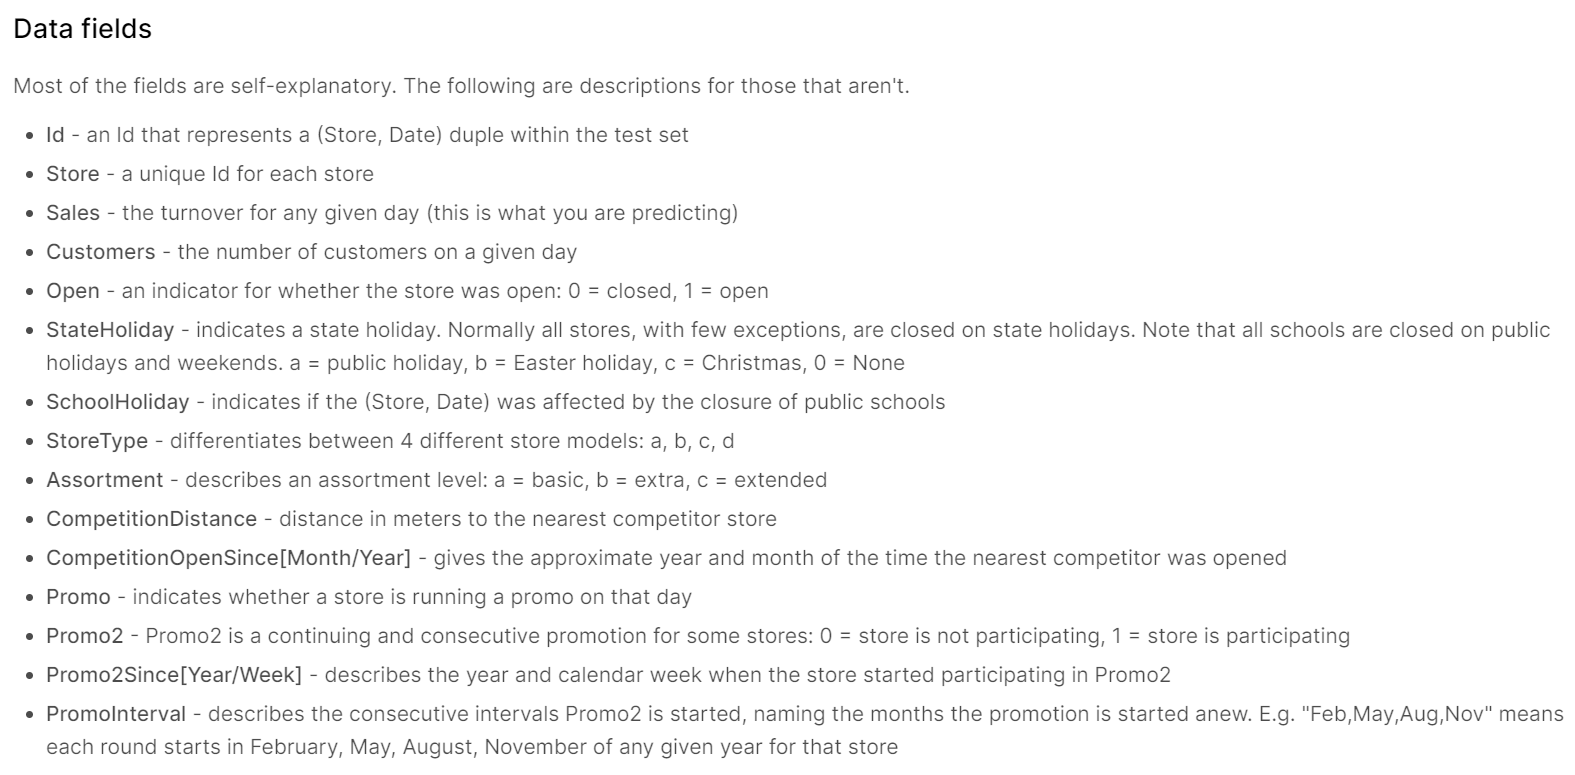

In [ ]:
# เช็คลักษณะข้อมูล
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
# เช็คข้อมูลที่มีค่าว่าง
df_test[df_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [ ]:
# เช็คสถิติเบื้องต้นของข้อมูล
df_process.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df_process['Store'].max()

1115

In [ ]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
# เช็คข้อมูลในคอลัมน์ โดยจะแสดงแต่ลักษณะข้อมูลที่ไม่ซ้ำกันเท่านั้น
print("df_process['StateHoliday']", df_process['StateHoliday'].unique())

df_process['StateHoliday'] ['0' 'a' 'b' 'c' 0]


In [ ]:
print("df_test['Open']", df_test['Open'].unique(), "\ndf_test['StateHoliday']", df_test['StateHoliday'].unique())

df_test['Open'] [ 1. nan  0.] 
df_test['StateHoliday'] ['0' 'a']


In [ ]:
# สร้างฟังก์ชันเลือกข้อมูลจาก Store ID
def select_data(df, store_number):
  df = df[df['Store'] == store_number]
  return df

df_process_622 = select_data(df_process, 622)
df_process_622.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
621,622,5,2015-07-31,6306,540,1,1,0,1
1736,622,4,2015-07-30,5412,406,1,1,0,1
2851,622,3,2015-07-29,5326,468,1,1,0,1
3966,622,2,2015-07-28,4966,417,1,1,0,1
5081,622,1,2015-07-27,5413,517,1,1,0,1


In [ ]:
# เช็คข้อมูล 5 แถวจากข้อมูลท้ายสุดขึ้นมา
df_process_622.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1012256,622,6,2013-01-05,2350,258,1,0,0,0
1013371,622,5,2013-01-04,3675,399,1,0,0,1
1014486,622,4,2013-01-03,4085,419,1,0,0,1
1015601,622,3,2013-01-02,4080,451,1,0,0,1
1016716,622,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df_process_1 = select_data(df_process, 1)
df_process_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
df_test = select_data(df_test, 622)
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
3903,3904,622,7,2015-09-13,0.0,0,0,0


In [ ]:
# เช็คจำนวนแถวและจำนวนคอลัมน์ของข้อมูล
df_process_622.shape

(942, 9)

In [ ]:
df_test.shape

(48, 8)

In [ ]:
# นับจำนวนข้อมูลที่ซ้ำกันในคอลัมน์ที่เลือก
df_process_622.groupby(['DayOfWeek','Open']).size().reset_index()

,DayOfWeek,Open,0
0,1,0,6
1,1,1,128
2,2,0,1
3,2,1,134
4,3,0,3
5,3,1,132
6,4,0,8
7,4,1,127
8,5,0,6
9,5,1,129


In [ ]:
df_test.groupby(['DayOfWeek','Open']).size().reset_index()

,DayOfWeek,Open,0
0,1,0.0,4
1,1,1.0,5986
2,2,0.0,4
3,2,1.0,5986
4,3,0.0,4
5,3,1.0,5986
6,4,0.0,3
7,4,1.0,5987
8,5,0.0,1
9,5,1.0,5134


Text(0.5, 1.0, 'Daily Sale Store 622')

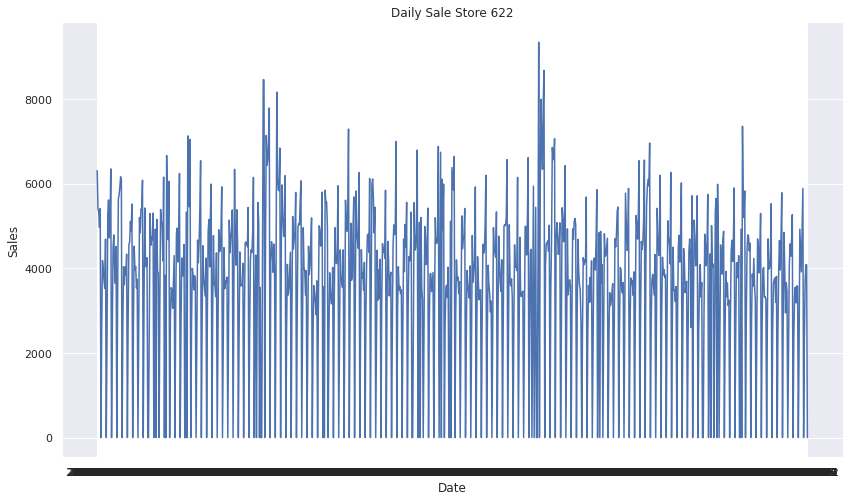

In [ ]:
# พล็อตกราฟ
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data = df_process_622, x="Date", y="Sales")
ax.set_title('Daily Sale Store 622')

In [ ]:
df = pd.concat([df_process_622, df_process_1]).reset_index(drop=True)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,622,5,2015-07-31,6306,540,1,1,0,1
1,622,4,2015-07-30,5412,406,1,1,0,1
2,622,3,2015-07-29,5326,468,1,1,0,1
3,622,2,2015-07-28,4966,417,1,1,0,1
4,622,1,2015-07-27,5413,517,1,1,0,1


Text(0.5, 1.0, 'Daily Sale Store 1, 622')

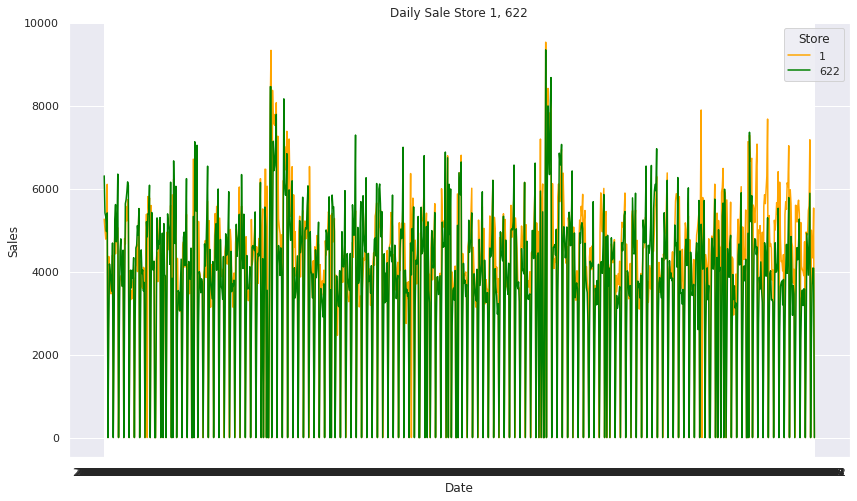

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data = df, x="Date", y="Sales", hue = 'Store', palette = ['orange', 'green'])
ax.set_title('Daily Sale Store 1, 622')

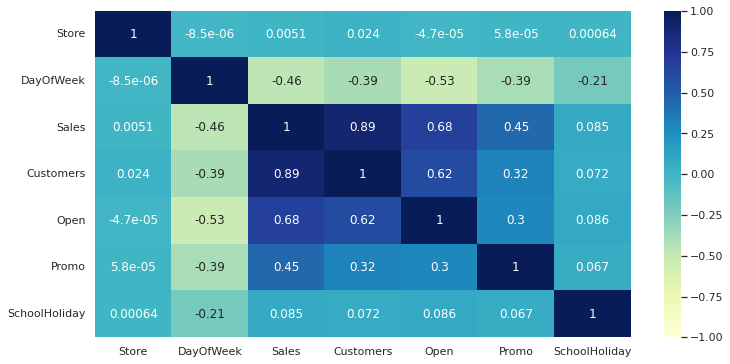

In [ ]:
# เช็คค่า Correlation จากกราฟ heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_process[df_process.columns].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

# Extract features

## Cleansing data

In [ ]:
df_process_622.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 621 to 1016716
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 105.9+ KB


In [ ]:
# แปลงวันที่ให้เป็น format ที่คำนวนเวลาได้
df_process_622['Date'] = pd.to_datetime(df_process_622['Date'], errors='coerce')

In [ ]:
# เรียงข้อมูลตามวันที่
df_process_622 = df_process_622.sort_values(by='Date')

In [ ]:
print("df_process_622['StateHoliday']", df_process_622['StateHoliday'].unique())

df_process_622['StateHoliday'] ['a' '0' 'b' 'c' 0]


In [ ]:
# เช็คว่าแต่ละค่ามีจำนวนเท่าไหร่
df_process_622['StateHoliday'].value_counts()

0    789
0    129
a     14
b      6
c      4
Name: StateHoliday, dtype: int64

In [ ]:
# แทนที่ข้อมูลในคอลัมน์ด้วยค่าที่ต้องการ
df_process_622['StateHoliday'] = df_process_622['StateHoliday'].replace('0', 0)

In [ ]:
df_process_622['StateHoliday'] = df_process_622['StateHoliday'].replace(['a', 'b', 'c'], 1)

In [ ]:
print("df_process_622['StateHoliday']", df_process_622['StateHoliday'].unique())

df_process_622['StateHoliday'] [1 0]


In [ ]:
df_process_622.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1016716 to 621
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          942 non-null    int64         
 1   DayOfWeek      942 non-null    int64         
 2   Date           942 non-null    datetime64[ns]
 3   Sales          942 non-null    int64         
 4   Customers      942 non-null    int64         
 5   Open           942 non-null    int64         
 6   Promo          942 non-null    int64         
 7   StateHoliday   942 non-null    int64         
 8   SchoolHoliday  942 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 73.6 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 479 to 40711
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             48 non-null     int64  
 1   Store          48 non-null     int64  
 2   DayOfWeek      48 non-null     int64  
 3   Date           48 non-null     object 
 4   Open           37 non-null     float64
 5   Promo          48 non-null     int64  
 6   StateHoliday   48 non-null     object 
 7   SchoolHoliday  48 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
df_test[df_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [ ]:
df_process_622.groupby(['DayOfWeek','Open']).size().reset_index()

,DayOfWeek,Open,0
0,1,0,6
1,1,1,128
2,2,0,1
3,2,1,134
4,3,0,3
5,3,1,132
6,4,0,8
7,4,1,127
8,5,0,6
9,5,1,129


In [ ]:
df_test.groupby(['DayOfWeek','Open']).size().reset_index()

,DayOfWeek,Open,0
0,1,1.0,5
1,2,1.0,5
2,3,1.0,5
3,4,1.0,5
4,5,1.0,5
5,6,1.0,5
6,7,0.0,7


In [ ]:
if 7 not in df_test['DayOfWeek']:
 df_test['Open'] = df_test['Open'].fillna(1)
else:
  df_test['Open'] = df_test['Open'].fillna(0)

In [ ]:
df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')

In [ ]:
df_test = df_test.sort_values(by='Date')

In [ ]:
# เปลี่ยนประเภทข้อมูลจาก float ให้เป็น int
df_test['Open'] = df_test['Open'].astype(int)

In [ ]:
print("df_test['StateHoliday']", df_test['StateHoliday'].unique())

df_test['StateHoliday'] ['0']


In [ ]:
df_test['StateHoliday'] = df_test['StateHoliday'].astype(int)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 40711 to 479
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             48 non-null     int64         
 1   Store          48 non-null     int64         
 2   DayOfWeek      48 non-null     int64         
 3   Date           48 non-null     datetime64[ns]
 4   Open           48 non-null     int64         
 5   Promo          48 non-null     int64         
 6   StateHoliday   48 non-null     int64         
 7   SchoolHoliday  48 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 3.4 KB


In [ ]:
df_process_622.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# ตัดคอลัมน์ที่ไม่ใช้ทิ้ง
df_process_622 = df_process_622.drop(['Customers', 'Store', 'DayOfWeek'], axis=1)
df_process_622.head()

,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
1016716,2013-01-01,0,0,0,1,1
1015601,2013-01-02,4080,1,0,0,1
1014486,2013-01-03,4085,1,0,0,1
1013371,2013-01-04,3675,1,0,0,1
1012256,2013-01-05,2350,1,0,0,0


In [ ]:
df_test = df_test.drop(['Id', 'Store', 'DayOfWeek'], axis=1)
df_test.head()

,Date,Open,Promo,StateHoliday,SchoolHoliday
40711,2015-08-01,1,0,0,0
39855,2015-08-02,0,0,0,0
38999,2015-08-03,1,1,0,1
38143,2015-08-04,1,1,0,1
37287,2015-08-05,1,1,0,1


##Train Test Split

In [ ]:
# แบ่งข้อมูลออกเป็น Trainset และ Testset
def train_test_split(df, train_size):
  train, test = df.iloc[:int(len(df)*train_size)], df.iloc[int(len(df)*train_size):]
  return train, test

df_process_622_train, df_process_622_test = train_test_split(df_process_622, train_size = 0.90)
print('Trainset size :', len(df_process_622_train))
print('Testset size  :', len(df_process_622_test))

Trainset size : 847
Testset size  : 95


## Feature extraction

In [ ]:
df_process_622_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 1016716 to 106546
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           847 non-null    datetime64[ns]
 1   Sales          847 non-null    int64         
 2   Open           847 non-null    int64         
 3   Promo          847 non-null    int64         
 4   StateHoliday   847 non-null    int64         
 5   SchoolHoliday  847 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 46.3 KB


In [ ]:
# เขียนฟังก์ชันเพื่อจัดการข้อมูลที่เป็นประเภท category ให้เป็น one hot encoding
def extract_feat(df):
  ef = df.copy()
  ef.index = ef['Date']
  ef = ef.drop(['Date'], axis=1)
  cat_cols = ef.select_dtypes('category').columns
  one_hot_df = pd.get_dummies(ef, columns=cat_cols)
  return one_hot_df

In [ ]:
ohe_train_process = extract_feat(df_process_622_train)
ohe_train_process.head()

,Sales,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,
2013-01-01,0,0,0,1,1
2013-01-02,4080,1,0,0,1
2013-01-03,4085,1,0,0,1
2013-01-04,3675,1,0,0,1
2013-01-05,2350,1,0,0,0


In [ ]:
y_train_process = ohe_train_process[['Sales']].values

In [ ]:
x_train_process = ohe_train_process.drop(['Sales'], axis=1)
x_train_process.head()

,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,
2013-01-01,0,0,1,1
2013-01-02,1,0,0,1
2013-01-03,1,0,0,1
2013-01-04,1,0,0,1
2013-01-05,1,0,0,0


In [ ]:
ohe_test_process = extract_feat(df_process_622_test)
ohe_test_process.head()

,Sales,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,
2015-04-28,4675,1,1,0,0
2015-04-29,5408,1,1,0,0
2015-04-30,6667,1,1,0,0
2015-05-01,0,0,1,1,0
2015-05-02,3837,1,0,0,0


In [ ]:
y_test_process = ohe_test_process[['Sales']].values

In [ ]:
x_test_process = ohe_test_process.drop(['Sales'], axis=1)
x_test_process.head()

,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,
2015-04-28,1,1,0,0
2015-04-29,1,1,0,0
2015-04-30,1,1,0,0
2015-05-01,0,1,1,0
2015-05-02,1,0,0,0


In [ ]:
# ฟังก์ชันที่ใช้เติมคอลัมน์ของข้อมูลชุดที่มีคอลัมน์น้อยกว่าให้มีจำนวนคอลัมน์เท่ากัน
def add_missing_columns(df_main, df_missing, noRandom = True):
  for col_name_main in df_main.columns:
    if col_name_main not in df_missing.columns:
      if noRandom:
        df_missing[col_name_main] = 0
      else:
        df_missing[col_name_main] = 'NA'
  return df_missing

In [ ]:
x_test_process = add_missing_columns(x_train_process, x_test_process)
x_test_process.head()

,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,
2015-04-28,1,1,0,0
2015-04-29,1,1,0,0
2015-04-30,1,1,0,0
2015-05-01,0,1,1,0
2015-05-02,1,0,0,0


In [ ]:
print('x_train_process shape', x_train_process.shape, '\nx_test_process shape', x_test_process.shape)

x_train_process shape (847, 4) 
x_test_process shape (95, 4)


# Train model

In [ ]:
# กำหนด Model
LNR = LinearRegression()
# Train model
LNR.fit(x_train_process, y_train_process)

LinearRegression()

# Test model

In [ ]:
# ทำนายค่า y
preds = LNR.predict(x_test_process)
preds

array([[ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 7.43391261e+02],
       [ 3.57054249e+03],
       [-5.00222086e-12],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 3.57054249e+03],
       [-5.00222086e-12],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [-6.96997617e+02],
       [ 3.99872940e+03],
       [ 3.57054249e+03],
       [-5.00222086e-12],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 3.57054249e+03],
       [-5.00222086e-12],
       [-6.96997617e+02],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [ 3.57054249e+03],
       [-5.00222086e-12],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.01093137e+03],
       [ 5.0

In [ ]:
preds_df = pd.DataFrame()
preds_df['Date'] = df_process_622_test['Date']
preds_df['Sales'] = preds
preds_df.head()

,Date,Sales
105431,2015-04-28,5010.931372
104316,2015-04-29,5010.931372
103201,2015-04-30,5010.931372
102086,2015-05-01,743.391261
100971,2015-05-02,3570.542493


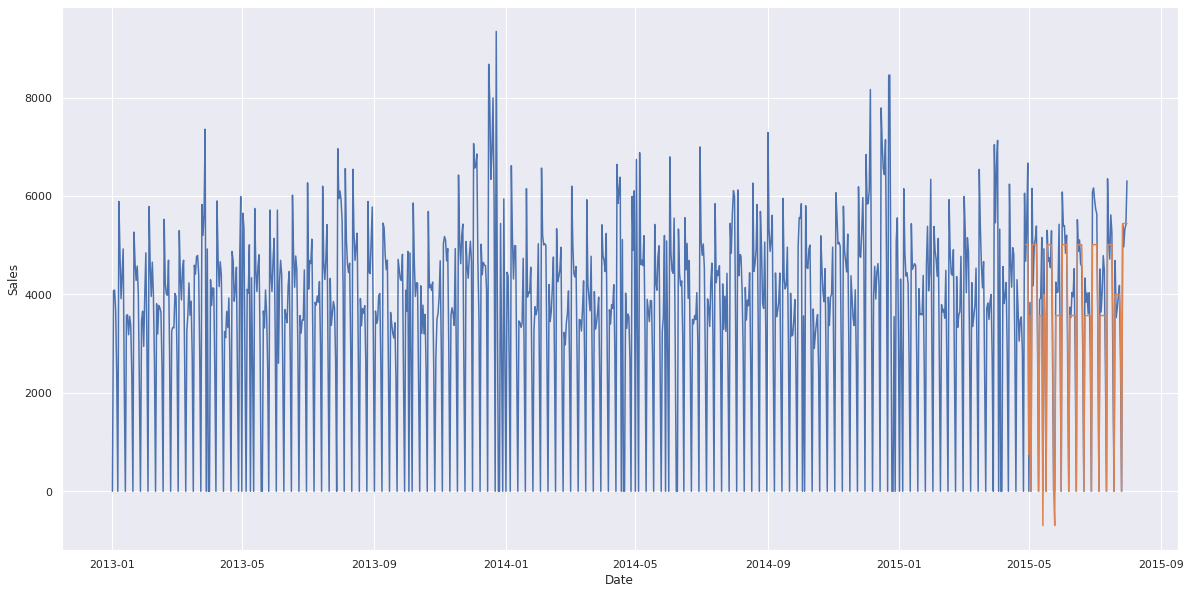

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = df_process_622['Date'], y = df_process_622['Sales'])
sns.lineplot(x = preds_df['Date'],  y = preds_df['Sales'])

# Evaluate

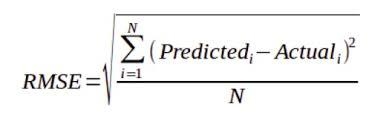

source : https://www.geeksforgeeks.org/root-mean-square-error-in-r-programming/

In [ ]:
# ฟังก์ชันที่ใช้ประเมินผลการทำนายโมเดล
def evaluate_mse(pred, label):
  rmse = mean_squared_error(pred, label, squared=True) ** 0.5
  return rmse

In [ ]:
print('RMSE :', evaluate_mse(preds, y_test_process))

RMSE : 646.5447165656476


# Pipe line

In [ ]:
def pipeline(n, df):
  # Read data
  df_process, df_test = read_data()

  # Select data
  df_process = select_data(df_process, n)

  # Clean data
  df_process['Date'] = pd.to_datetime(df_process['Date'], errors='coerce')
  df_process = df_process.sort_values(by='Date')
  df_process['StateHoliday'] = df_process['StateHoliday'].replace('0', 0)
  df_process['StateHoliday'] = df_process['StateHoliday'].replace(['a', 'b', 'c'], 1)
  df_process = df_process.drop(['Customers', 'Store', 'DayOfWeek'], axis=1) # ถ้าจะลองเอาไปเขียนเพื่อทำ submission ใน Kaggle ให้ลบ " , 'Store' " ออก แล้วเปลี่ยนประเภทข้อมูลให้เป็น category
  # if 7 not in df_test['DayOfWeek']:
  #   df_test['Open'] = df_test['Open'].fillna(1)
  # else:
  #   df_test['Open'] = df_test['Open'].fillna(0)
  # df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')
  # df_test = df_test.sort_values(by='Date')
  # df_test['Open'] = df_test['Open'].astype(int)
  # df_test['Store'] = df_test['Store'].astype('category')
  # df_test['StateHoliday'] = df_test['StateHoliday'].replace('a', 1)
  # df_test = df_test.drop(['Id', 'DayOfWeek'], axis=1)

  # Train-Test split
  df_process_train, df_process_test = train_test_split(df_process, train_size = 0.90)

  # Feature extraction
  ohe_train_process = extract_feat(df_process_train)
  y_train_process = ohe_train_process[['Sales']].values
  x_train_process = ohe_train_process.drop(['Sales'], axis=1)
  ohe_test_process = extract_feat(df_process_test)
  y_test_process = ohe_test_process[['Sales']].values
  x_test_process = ohe_test_process.drop(['Sales'], axis=1)
  x_test_process = add_missing_columns(x_train_process, x_test_process)
  # ohe_test = extract_feat(df_test)
  # x_test = add_missing_columns(x_train_process, ohe_test)

  # Train model
  LNR = LinearRegression()
  LNR.fit(x_train_process, y_train_process)

  # Predict model
  preds = LNR.predict(x_test_process)
  rmse = evaluate_mse(preds, y_test_process)
  print('RMSE y_test :', rmse)
  newPred = LNR.predict(df)
  return newPred

In [ ]:
preds_test = pipeline(622, x_train_process)

RMSE y_test : 646.5447165656476


# Predict new date

In [ ]:
# เช็ควันที่วันสุดท้ายของข้อมูล
x_train_process.tail()

,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,
2015-04-23,1,0,0,0
2015-04-24,1,0,0,0
2015-04-25,1,0,0,0
2015-04-26,0,0,0,0
2015-04-27,1,1,0,0


In [ ]:
# ฟังก์ชันสร้างชุดข้อมูลใหม่
def predNew():
  df = pd.DataFrame(index=pd.date_range(start = '2015-04-28', periods=7))
  df = add_missing_columns(x_train_process, df, False)
  for i in df.columns:
    for j in range(len(df[i])):
      if df[i][j] == 'NA':
        df[i][j] = df[i][j].replace('NA', str(np.random.randint(2)))
    df[i] = df[i].astype(int)
  return df

In [ ]:
newData = predNew()
newData.head()

,Open,Promo,StateHoliday,SchoolHoliday
2015-04-28,0,0,1,0
2015-04-29,0,1,0,1
2015-04-30,0,1,0,1
2015-05-01,1,0,0,1
2015-05-02,1,0,1,0


In [ ]:
preds_new = pipeline(498, newData)

RMSE y_test : 737.3013883443621


No handles with labels found to put in legend.


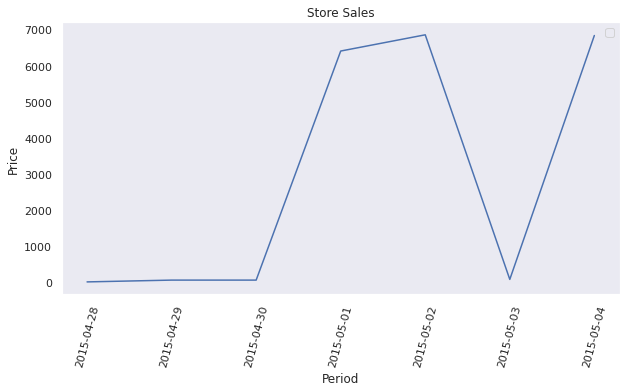

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(newData.index, preds_new)
plt.title('Store Sales')
plt.xlabel('Period')
plt.xticks(rotation=75)
plt.ylabel('Price')
plt.legend()
plt.grid()